<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/5_pytorch_retinanet/Example - Indoor Image Object Detection and Tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the network

1. Paper on Focal Loss: https://arxiv.org/abs/1708.02002

2. Blog 1 on RetinaNet: https://medium.com/@14prakash/the-intuition-behind-retinanet-eb636755607d

3. Blog 2 on RetinaNet: https://blog.zenggyu.com/en/post/2018-12-05/retinanet-explained-and-demystified/

4. Blog 3 on RetinaNet: https://towardsdatascience.com/review-retinanet-focal-loss-object-detection-38fba6afabe4

5. Blog 4 on RetinaNet: https://analyticsindiamag.com/what-is-retinanet-ssd-focal-loss/

6. Blog 5 on RetinaNet: https://towardsdatascience.com/object-detection-on-aerial-imagery-using-retinanet-626130ba2203

# Table of contents


## 1. Installation Instructions



## 2. Use trained model to detect billboard in images



## 3. How to train using Open Images dataset (billboard subset)

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/5_pytorch_retinanet/installation
     
 - Select the right requirements file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements_cuda.txt | xargs -n 1 -L 1 pip install

# Use already trained model for demo

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hvbUShscIFK8nLyDgzvxQYuhx6K2YMr8' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1hvbUShscIFK8nLyDgzvxQYuhx6K2YMr8" -O indoor_trained.zip && rm -rf /tmp/cookies.txt

In [6]:
! unzip -qq indoor_trained.zip

In [7]:
gtf.Model(model_path="indoor_trained/final_model.pt");

/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [8]:
f = open("indoor_trained/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

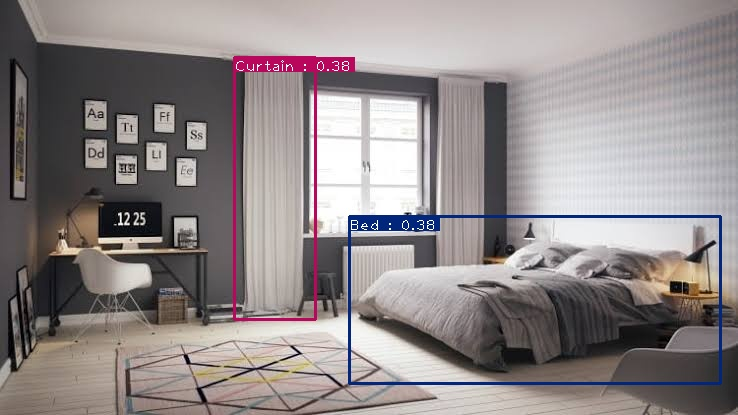

In [14]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img2.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.1);
from IPython.display import Image
Image(filename='output.jpg') 

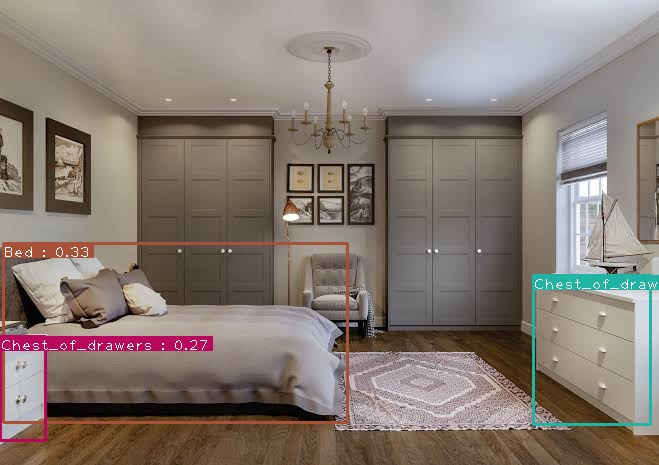

In [15]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img3.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.1);
from IPython.display import Image
Image(filename='output.jpg') 

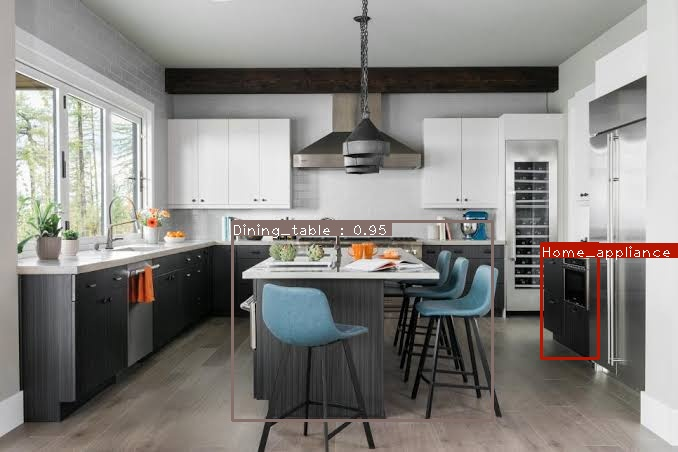

In [16]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img5.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.1);
from IPython.display import Image
Image(filename='output.jpg') 

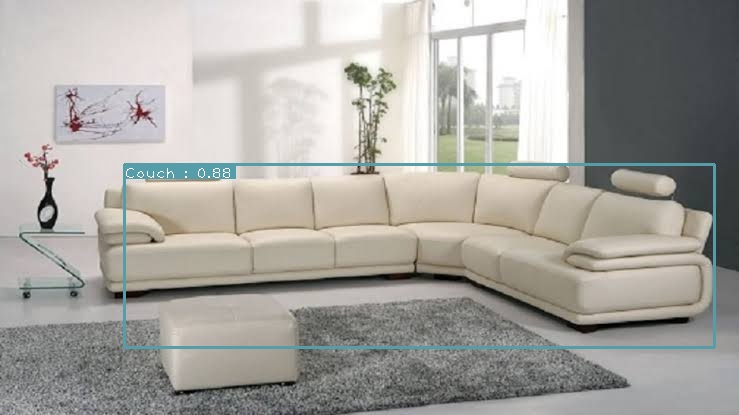

In [17]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img6.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.1);
from IPython.display import Image
Image(filename='output.jpg') 

# Train you own detector

# For room type classification refer to 

- https://medium.com/@monkai.betasignup/fine-tuning-with-monk-6cec33fd6252

# Dataset

  - Credits - https://storage.googleapis.com/openimages/web/index.html
  
  - Collected using - https://github.com/EscVM/OIDv4_ToolKit
  
       - Command used to collect (inside OIDv4_ToolKit)
         - python main.py downloader --classes Apple Orange --type_csv validation
         
  - Converted the dataset to COCO format

# How the dataset was prepared (Else - Download formatted data as mentioned in the cells below)

- git clone https://github.com/EscVM/OIDv4_ToolKit
- cd OIDv4_ToolKit

- python main.py downloader --classes Alarm_clock --type_csv train
- mv OID/Dataset/train/Alarm\ clock OID/Dataset/train/Alarm_clock

- python main.py downloader --classes Bathroom_cabinet --type_csv train
- mv OID/Dataset/train/Bathroom\ cabinet OID/Dataset/train/Bathroom_cabinet

- python main.py downloader --classes Bathtub --type_csv train

- python main.py downloader --classes Bed --type_csv train

- python main.py downloader --classes Bookcase --type_csv train

- python main.py downloader --classes Ceiling_fan --type_csv train
- mv OID/Dataset/train/Ceiling\ fan OID/Dataset/train/Ceiling_fan

- python main.py downloader --classes Chest_of_drawers --type_csv train
- mv OID/Dataset/train/Chest\ of\ drawers OID/Dataset/train/Chest_of_drawers

- python main.py downloader --classes Clock --type_csv train

- python main.py downloader --classes Closet --type_csv train

- python main.py downloader --classes Computer_monitor --type_csv train
- mv OID/Dataset/train/Computer\ monitor OID/Dataset/train/Computer_monitor

- python main.py downloader --classes Curtain --type_csv train

- python main.py downloader --classes Dishwasher --type_csv train

- python main.py downloader --classes Drawer --type_csv train

- python main.py downloader --classes Fireplace --type_csv train

- python main.py downloader --classes Gas_stove --type_csv train
- mv OID/Dataset/train/Gas\ stove OID/Dataset/train/Gas_stove

- python main.py downloader --classes Couch --type_csv train

- python main.py downloader --classes Infant_bed --type_csv train
- mv OID/Dataset/train/Infant\ bed OID/Dataset/train/Infant_bed

- python main.py downloader --classes Microwave_oven --type_csv train
- mv OID/Dataset/train/Microwave\ oven OID/Dataset/train/Microwave_oven

- python main.py downloader --classes Kitchen_\&_dining_room_table --type_csv train
- mv OID/Dataset/train/Kitchen\ \&\ dining\ room\ table/ OID/Dataset/train/Dining_table


- python main.py downloader --classes Sofa_bed --type_csv train
- mv OID/Dataset/train/Sofa\ bed OID/Dataset/train/Sofa_bed


- python main.py downloader --classes Toilet --type_csv train


- python main.py downloader --classes Washing_machine --type_csv train
- mv OID/Dataset/train/Washing\ machine OID/Dataset/train/Washing_machine


- python main.py downloader --classes Wardrobe --type_csv train


- python main.py downloader --classes Home_appliance --type_csv train
- mv OID/Dataset/train/Home\ appliance OID/Dataset/train/Home_appliance

In [ ]:
import os
import sys
import cv2
import json
from tqdm.notebook import tqdm
import pandas as pd


combined = [];

complete_list = sorted(os.listdir("OIDv4_ToolKit/OID/Dataset/train/"))

for i in tqdm(range(len(complete_list))):
    name = complete_list[i];

    files = os.listdir("OIDv4_ToolKit/OID/Dataset/train/" + name + "/Label/");

    for i in tqdm(range(len(files))):
        f = open("OIDv4_ToolKit/OID/Dataset/train/" + name + "/Label/" + files[i]);
        img_name = files[i].split(".")[0] + ".jpg";
        img = cv2.imread("OIDv4_ToolKit/OID/Dataset/train/" + name + "/" + img_name)
        lines = f.readlines();
        f.close()
        anno = "";
        for j in range(len(lines)):
            tmp = lines[j].split(" ");
            x1 = int(float(tmp[-4]))
            y1 = int(float(tmp[-3]))
            x2 = int(float(tmp[-2]))
            y2 = int(float(tmp[-1]))

            anno += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + name + " ";
        anno = anno[:-1]
        combined.append([name + "/" + img_name, anno]);
        

df = pd.DataFrame(combined, columns = ['ID', 'Labels'])  
df.to_csv("OIDv4_ToolKit/OID/Dataset/train/train_labels.csv", index=False)

root = "OIDv4_ToolKit/OID/Dataset/";
img_dir = "train";
anno_file = "train/train_labels.csv";

dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/annotations/";

if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";

if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);
    
df = pd.read_csv(input_annotations_path);
columns = df.columns
delimiter = " ";

list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    for j in range(len(tmp)//5):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;


for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    image_in_path = input_images_folder + "/" + img_name;
    img = cv2.imread(image_in_path, 1);
    h, w, c = img.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

# Download the formatted dataset

In [1]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bXzK3SYRCoUj9-zsiLOSWM86LJ6z9p0t' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1bXzK3SYRCoUj9-zsiLOSWM86LJ6z9p0t" -O OIDv4_ToolKit.zip && rm -rf /tmp/cookies.txt

--2020-01-19 20:05:34--  https://docs.google.com/uc?export=download&id=1bXzK3SYRCoUj9-zsiLOSWM86LJ6z9p0t
Resolving docs.google.com (docs.google.com)... 172.217.4.238, 2607:f8b0:4009:802::200e
Connecting to docs.google.com (docs.google.com)|172.217.4.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.18K  --.-KB/s    in 0s      

2020-01-19 20:05:34 (52.9 MB/s) - written to stdout [3252]

--2020-01-19 20:05:34--  https://docs.google.com/uc?export=download&confirm=JiAq&id=1bXzK3SYRCoUj9-zsiLOSWM86LJ6z9p0t
Resolving docs.google.com (docs.google.com)... 172.217.4.238, 2607:f8b0:4009:802::200e
Connecting to docs.google.com (docs.google.com)|172.217.4.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/olh2k98avbh39pv7skh5lj72693tooa7/157

In [2]:
! unzip -q OIDv4_ToolKit.zip

# COCO Format - 2

## Dataset Directory Structure

         ./ (root_dir)
          |
          |------billboard (coco_dir) 
          |         |
          |         |---Images (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_Images.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 
 For TrainSet
 - root_dir = "OIDv4_ToolKit/OID/Dataset/";
 - coco_dir = "";
 - img_dir = "";
 - set_dir = "train";

 
 Note: Annotation file name too coincides against the set_dir

# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [4]:
root_dir = "OIDv4_ToolKit/OID/Dataset/";
coco_dir = "";
img_dir = "";
set_dir = "train";

In [5]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=16, use_gpu=True)

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!
Num training images: 28740


In [6]:
gtf.Model(model_name="resnet50", gpu_devices=[0, 1, 2, 3]);

In [7]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, print_interval=20)

In [8]:
gtf.Train(num_epochs=10, output_model_name="final_model.pt");

Epoch: 0 | Iteration: 0 | Classification loss: 1.21028 | Regression loss: 1.01650 | Running loss: 2.22679
Epoch: 0 | Iteration: 20 | Classification loss: 1.14141 | Regression loss: 1.08101 | Running loss: 2.16588
Epoch: 0 | Iteration: 40 | Classification loss: 1.13358 | Regression loss: 0.84646 | Running loss: 2.14157
Epoch: 0 | Iteration: 60 | Classification loss: 0.87600 | Regression loss: 0.95425 | Running loss: 2.10382
Epoch: 0 | Iteration: 80 | Classification loss: 0.98207 | Regression loss: 0.89105 | Running loss: 2.05811
Epoch: 0 | Iteration: 100 | Classification loss: 0.89620 | Regression loss: 0.91601 | Running loss: 2.01301
Epoch: 0 | Iteration: 120 | Classification loss: 0.64787 | Regression loss: 0.85606 | Running loss: 1.96832
Epoch: 0 | Iteration: 140 | Classification loss: 1.05667 | Regression loss: 0.82374 | Running loss: 1.93898
Epoch: 0 | Iteration: 160 | Classification loss: 0.58162 | Regression loss: 0.83195 | Running loss: 1.90727
Epoch: 0 | Iteration: 180 | Classi

Epoch: 0 | Iteration: 1520 | Classification loss: 0.44238 | Regression loss: 0.40055 | Running loss: 1.21646
Epoch: 0 | Iteration: 1540 | Classification loss: 0.59042 | Regression loss: 0.53806 | Running loss: 1.20987
Epoch: 0 | Iteration: 1560 | Classification loss: 0.57579 | Regression loss: 0.57509 | Running loss: 1.20460
Epoch: 0 | Iteration: 1580 | Classification loss: 0.67399 | Regression loss: 0.63293 | Running loss: 1.19951
Epoch: 0 | Iteration: 1600 | Classification loss: 0.88297 | Regression loss: 0.54623 | Running loss: 1.19838
Epoch: 0 | Iteration: 1620 | Classification loss: 0.58945 | Regression loss: 0.64094 | Running loss: 1.19382
Epoch: 0 | Iteration: 1640 | Classification loss: 0.66981 | Regression loss: 0.61213 | Running loss: 1.18988
Epoch: 0 | Iteration: 1660 | Classification loss: 0.73622 | Regression loss: 0.62554 | Running loss: 1.18806
Epoch: 0 | Iteration: 1680 | Classification loss: 0.45673 | Regression loss: 0.52804 | Running loss: 1.18971
Epoch: 0 | Iteratio

Epoch: 1 | Iteration: 1240 | Classification loss: 0.61049 | Regression loss: 0.50320 | Running loss: 1.02012
Epoch: 1 | Iteration: 1260 | Classification loss: 0.44703 | Regression loss: 0.56524 | Running loss: 1.02327
Epoch: 1 | Iteration: 1280 | Classification loss: 0.70669 | Regression loss: 0.64105 | Running loss: 1.02379
Epoch: 1 | Iteration: 1300 | Classification loss: 0.29812 | Regression loss: 0.42730 | Running loss: 1.01868
Epoch: 1 | Iteration: 1320 | Classification loss: 0.72884 | Regression loss: 0.58235 | Running loss: 1.02056
Epoch: 1 | Iteration: 1340 | Classification loss: 0.32770 | Regression loss: 0.40179 | Running loss: 1.02381
Epoch: 1 | Iteration: 1360 | Classification loss: 0.53399 | Regression loss: 0.54606 | Running loss: 1.02401
Epoch: 1 | Iteration: 1380 | Classification loss: 0.36617 | Regression loss: 0.40831 | Running loss: 1.02115
Epoch: 1 | Iteration: 1400 | Classification loss: 0.40724 | Regression loss: 0.44760 | Running loss: 1.02153
Epoch: 1 | Iteratio

Epoch: 2 | Iteration: 960 | Classification loss: 0.71577 | Regression loss: 0.63076 | Running loss: 0.91528
Epoch: 2 | Iteration: 980 | Classification loss: 0.55205 | Regression loss: 0.50970 | Running loss: 0.91590
Epoch: 2 | Iteration: 1000 | Classification loss: 0.41351 | Regression loss: 0.34595 | Running loss: 0.91187
Epoch: 2 | Iteration: 1020 | Classification loss: 0.49524 | Regression loss: 0.46763 | Running loss: 0.90739
Epoch: 2 | Iteration: 1040 | Classification loss: 0.20993 | Regression loss: 0.30522 | Running loss: 0.90916
Epoch: 2 | Iteration: 1060 | Classification loss: 0.56990 | Regression loss: 0.60148 | Running loss: 0.91468
Epoch: 2 | Iteration: 1080 | Classification loss: 0.65907 | Regression loss: 0.42075 | Running loss: 0.91065
Epoch: 2 | Iteration: 1100 | Classification loss: 0.24098 | Regression loss: 0.39516 | Running loss: 0.91035
Epoch: 2 | Iteration: 1120 | Classification loss: 0.46149 | Regression loss: 0.52448 | Running loss: 0.90862
Epoch: 2 | Iteration:

Epoch: 3 | Iteration: 680 | Classification loss: 0.22888 | Regression loss: 0.34341 | Running loss: 0.84206
Epoch: 3 | Iteration: 700 | Classification loss: 0.58572 | Regression loss: 0.38012 | Running loss: 0.84715
Epoch: 3 | Iteration: 720 | Classification loss: 0.84003 | Regression loss: 0.55983 | Running loss: 0.84638
Epoch: 3 | Iteration: 740 | Classification loss: 0.56396 | Regression loss: 0.42103 | Running loss: 0.84616
Epoch: 3 | Iteration: 760 | Classification loss: 0.37679 | Regression loss: 0.47493 | Running loss: 0.84602
Epoch: 3 | Iteration: 780 | Classification loss: 0.38118 | Regression loss: 0.33265 | Running loss: 0.84527
Epoch: 3 | Iteration: 800 | Classification loss: 0.42026 | Regression loss: 0.45297 | Running loss: 0.84488
Epoch: 3 | Iteration: 820 | Classification loss: 0.49275 | Regression loss: 0.43890 | Running loss: 0.84625
Epoch: 3 | Iteration: 840 | Classification loss: 0.48443 | Regression loss: 0.43232 | Running loss: 0.85235
Epoch: 3 | Iteration: 860 | 

Epoch: 4 | Iteration: 400 | Classification loss: 0.36891 | Regression loss: 0.31260 | Running loss: 0.77498
Epoch: 4 | Iteration: 420 | Classification loss: 0.34558 | Regression loss: 0.31371 | Running loss: 0.77278
Epoch: 4 | Iteration: 440 | Classification loss: 0.43618 | Regression loss: 0.34671 | Running loss: 0.76934
Epoch: 4 | Iteration: 460 | Classification loss: 0.39845 | Regression loss: 0.31136 | Running loss: 0.76583
Epoch: 4 | Iteration: 480 | Classification loss: 0.42742 | Regression loss: 0.36404 | Running loss: 0.76433
Epoch: 4 | Iteration: 500 | Classification loss: 0.26595 | Regression loss: 0.34946 | Running loss: 0.76204
Epoch: 4 | Iteration: 520 | Classification loss: 0.25832 | Regression loss: 0.33821 | Running loss: 0.76060
Epoch: 4 | Iteration: 540 | Classification loss: 0.47924 | Regression loss: 0.45301 | Running loss: 0.76210
Epoch: 4 | Iteration: 560 | Classification loss: 0.28567 | Regression loss: 0.36082 | Running loss: 0.76379
Epoch: 4 | Iteration: 580 | 

Epoch: 5 | Iteration: 120 | Classification loss: 0.32661 | Regression loss: 0.38698 | Running loss: 0.75965
Epoch: 5 | Iteration: 140 | Classification loss: 0.25362 | Regression loss: 0.33704 | Running loss: 0.75822
Epoch: 5 | Iteration: 160 | Classification loss: 0.23429 | Regression loss: 0.26795 | Running loss: 0.75673
Epoch: 5 | Iteration: 180 | Classification loss: 0.48523 | Regression loss: 0.31719 | Running loss: 0.75322
Epoch: 5 | Iteration: 200 | Classification loss: 0.10275 | Regression loss: 0.19856 | Running loss: 0.74544
Epoch: 5 | Iteration: 220 | Classification loss: 0.34241 | Regression loss: 0.30462 | Running loss: 0.74229
Epoch: 5 | Iteration: 240 | Classification loss: 0.35734 | Regression loss: 0.34435 | Running loss: 0.74098
Epoch: 5 | Iteration: 260 | Classification loss: 0.58146 | Regression loss: 0.38576 | Running loss: 0.73791
Epoch: 5 | Iteration: 280 | Classification loss: 0.31731 | Regression loss: 0.26510 | Running loss: 0.72997
Epoch: 5 | Iteration: 300 | 

Epoch: 5 | Iteration: 1640 | Classification loss: 0.49594 | Regression loss: 0.32338 | Running loss: 0.72382
Epoch: 5 | Iteration: 1660 | Classification loss: 1.46323 | Regression loss: 0.47433 | Running loss: 0.72396
Epoch: 5 | Iteration: 1680 | Classification loss: 0.32158 | Regression loss: 0.34154 | Running loss: 0.72375
Epoch: 5 | Iteration: 1700 | Classification loss: 0.30745 | Regression loss: 0.37864 | Running loss: 0.72457
Epoch: 5 | Iteration: 1720 | Classification loss: 0.32412 | Regression loss: 0.37069 | Running loss: 0.72599
Epoch: 5 | Iteration: 1740 | Classification loss: 0.41668 | Regression loss: 0.35833 | Running loss: 0.72596
Epoch: 5 | Iteration: 1760 | Classification loss: 0.19437 | Regression loss: 0.31494 | Running loss: 0.73093
Epoch: 5 | Iteration: 1780 | Classification loss: 0.42579 | Regression loss: 0.33354 | Running loss: 0.73020
Epoch: 6 | Iteration: 0 | Classification loss: 0.22587 | Regression loss: 0.35431 | Running loss: 0.73036
Epoch: 6 | Iteration: 

Epoch: 6 | Iteration: 1360 | Classification loss: 0.44343 | Regression loss: 0.31625 | Running loss: 0.67564
Epoch: 6 | Iteration: 1380 | Classification loss: 0.27204 | Regression loss: 0.25370 | Running loss: 0.67042
Epoch: 6 | Iteration: 1400 | Classification loss: 0.31645 | Regression loss: 0.34034 | Running loss: 0.67440
Epoch: 6 | Iteration: 1420 | Classification loss: 0.23328 | Regression loss: 0.33292 | Running loss: 0.67288
Epoch: 6 | Iteration: 1440 | Classification loss: 0.21722 | Regression loss: 0.32620 | Running loss: 0.67207
Epoch: 6 | Iteration: 1460 | Classification loss: 0.34617 | Regression loss: 0.43390 | Running loss: 0.67427
Epoch: 6 | Iteration: 1480 | Classification loss: 0.13192 | Regression loss: 0.25632 | Running loss: 0.67371
Epoch: 6 | Iteration: 1500 | Classification loss: 0.55680 | Regression loss: 0.33094 | Running loss: 0.67598
Epoch: 6 | Iteration: 1520 | Classification loss: 0.39045 | Regression loss: 0.39928 | Running loss: 0.67459
Epoch: 6 | Iteratio

Epoch: 7 | Iteration: 1080 | Classification loss: 0.29436 | Regression loss: 0.28089 | Running loss: 0.61758
Epoch: 7 | Iteration: 1100 | Classification loss: 0.57608 | Regression loss: 0.30033 | Running loss: 0.62121
Epoch: 7 | Iteration: 1120 | Classification loss: 0.64666 | Regression loss: 0.40692 | Running loss: 0.62038
Epoch: 7 | Iteration: 1140 | Classification loss: 0.26060 | Regression loss: 0.30825 | Running loss: 0.62358
Epoch: 7 | Iteration: 1160 | Classification loss: 0.23263 | Regression loss: 0.31548 | Running loss: 0.62252
Epoch: 7 | Iteration: 1180 | Classification loss: 0.15704 | Regression loss: 0.20535 | Running loss: 0.62269
Epoch: 7 | Iteration: 1200 | Classification loss: 0.19851 | Regression loss: 0.32753 | Running loss: 0.62299
Epoch: 7 | Iteration: 1220 | Classification loss: 0.13932 | Regression loss: 0.19815 | Running loss: 0.62216
Epoch: 7 | Iteration: 1240 | Classification loss: 0.14291 | Regression loss: 0.33527 | Running loss: 0.62595
Epoch: 7 | Iteratio

Epoch: 8 | Iteration: 800 | Classification loss: 0.32873 | Regression loss: 0.33902 | Running loss: 0.56461
Epoch: 8 | Iteration: 820 | Classification loss: 0.21630 | Regression loss: 0.29938 | Running loss: 0.56539
Epoch: 8 | Iteration: 840 | Classification loss: 0.38404 | Regression loss: 0.28459 | Running loss: 0.56957
Epoch: 8 | Iteration: 860 | Classification loss: 0.28689 | Regression loss: 0.27412 | Running loss: 0.57488
Epoch: 8 | Iteration: 880 | Classification loss: 0.37556 | Regression loss: 0.31276 | Running loss: 0.57600
Epoch: 8 | Iteration: 900 | Classification loss: 0.25807 | Regression loss: 0.27906 | Running loss: 0.57734
Epoch: 8 | Iteration: 920 | Classification loss: 0.40142 | Regression loss: 0.35914 | Running loss: 0.57657
Epoch: 8 | Iteration: 940 | Classification loss: 0.24028 | Regression loss: 0.31581 | Running loss: 0.57849
Epoch: 8 | Iteration: 960 | Classification loss: 0.25306 | Regression loss: 0.27809 | Running loss: 0.57793
Epoch: 8 | Iteration: 980 | 

Epoch: 9 | Iteration: 520 | Classification loss: 0.28835 | Regression loss: 0.35912 | Running loss: 0.52742
Epoch: 9 | Iteration: 540 | Classification loss: 0.26577 | Regression loss: 0.22427 | Running loss: 0.52830
Epoch: 9 | Iteration: 560 | Classification loss: 0.30147 | Regression loss: 0.27663 | Running loss: 0.52946
Epoch: 9 | Iteration: 580 | Classification loss: 0.16721 | Regression loss: 0.22301 | Running loss: 0.52967
Epoch: 9 | Iteration: 600 | Classification loss: 0.15366 | Regression loss: 0.18048 | Running loss: 0.52896
Epoch: 9 | Iteration: 620 | Classification loss: 0.21211 | Regression loss: 0.33791 | Running loss: 0.52569
Epoch: 9 | Iteration: 640 | Classification loss: 0.53367 | Regression loss: 0.33793 | Running loss: 0.52835
Epoch: 9 | Iteration: 660 | Classification loss: 0.21950 | Regression loss: 0.28367 | Running loss: 0.53055
Epoch: 9 | Iteration: 680 | Classification loss: 0.85434 | Regression loss: 0.36017 | Running loss: 0.53495
Epoch: 9 | Iteration: 700 | 

# Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.Model(model_path="final_model.pt");

/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [5]:
class_list = ['Alarm_clock', 'Bathroom_cabinet', 'Bathtub', 'Bed', 'Bookcase', 'Ceiling_fan', 'Chest_of_drawers', 
               'Clock', 'Closet', 'Computer_monitor', 'Couch', 'Curtain', 'Dining_table', 'Dishwasher', 
              'Drawer', 'Fireplace', 'Gas_stove', 'Home_appliance', 'Infant_bed', 'Microwave_oven', 'Sofa_bed', 
              'Toilet', 'Wardrobe', 'Washing_machine', 'Window'];

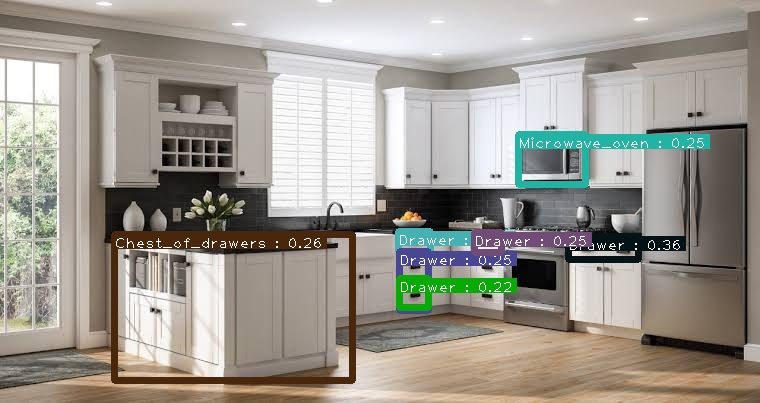

In [21]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img1.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

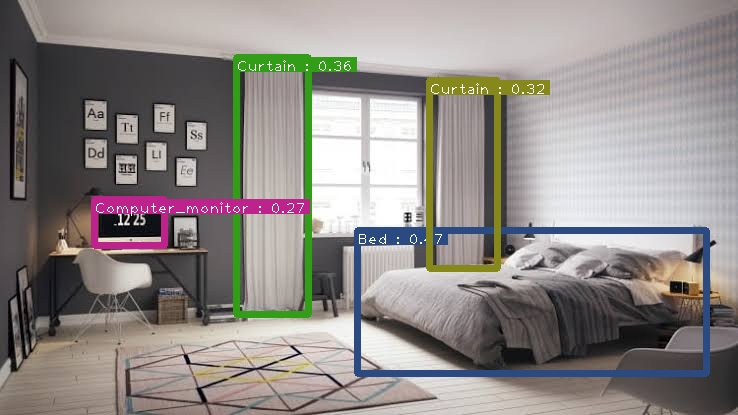

In [13]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img2.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

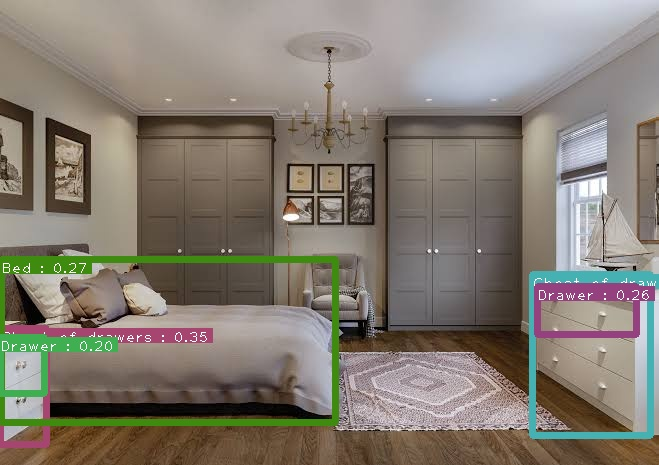

In [16]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img3.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

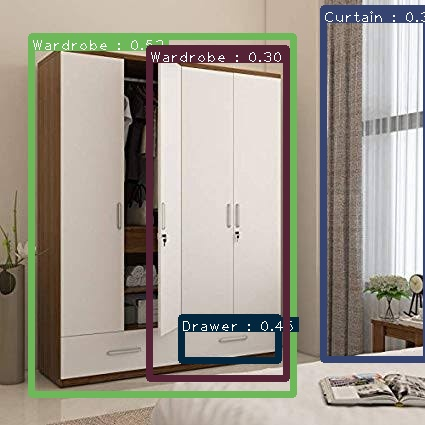

In [18]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img4.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);
from IPython.display import Image
Image(filename='output.jpg') 

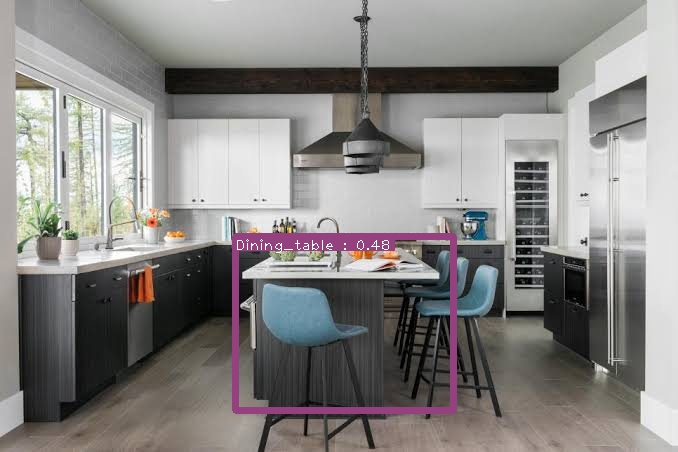

In [25]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img5.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);
from IPython.display import Image
Image(filename='output.jpg') 

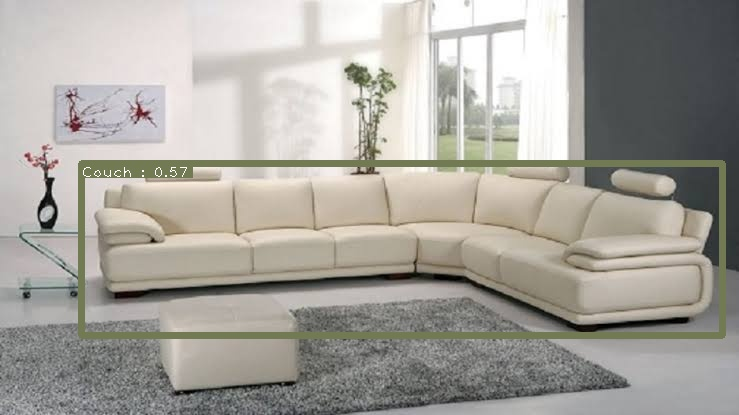

In [26]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img6.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);
from IPython.display import Image
Image(filename='output.jpg') 

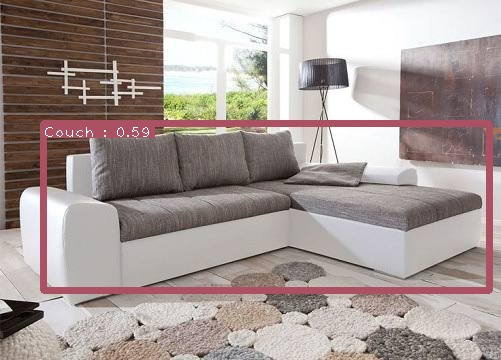

In [27]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img7.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);
from IPython.display import Image
Image(filename='output.jpg') 

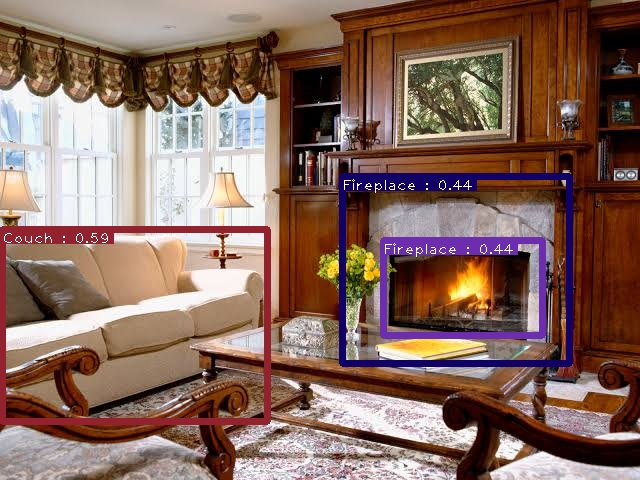

In [29]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img8.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);
from IPython.display import Image
Image(filename='output.jpg') 

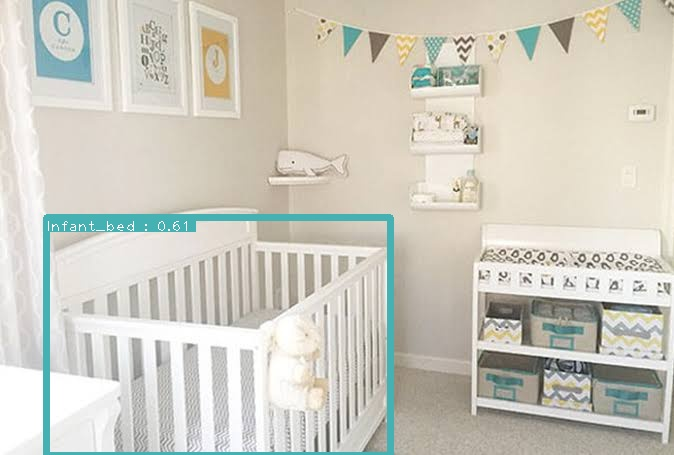

In [32]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img9.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);
from IPython.display import Image
Image(filename='output.jpg') 

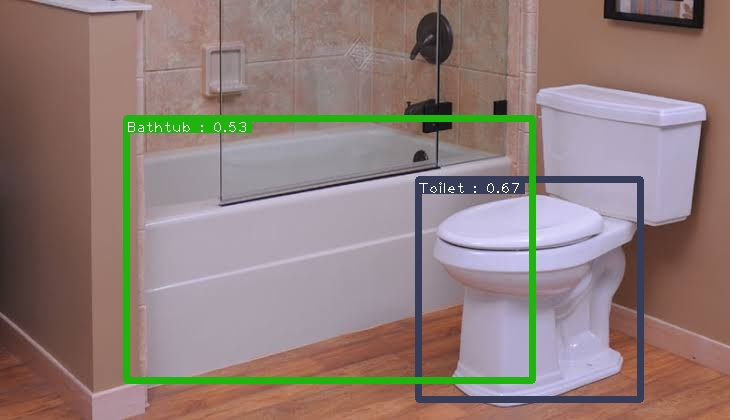

In [34]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/indoor_test/img10.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.3);
from IPython.display import Image
Image(filename='output.jpg') 